### Goal

- 교차 검증(cross-validaation)
- 편향 분산 트레이드오프(bias variance tradeoff)
- 오버피팅 및 언더피팅(Overfitting and underfitting)
- 앙상블 기술(Ensembling techiques)
- 랜덤 포레스트(Random forests)
- 신경망(Neural networks)

### 편향(bias) 분산(variance) 트레이드 오프

#### 편향?

bias으로 인한 오차를 이야기할 때 모델이 기대하는 예측과 우리가 예측하려고 하는 실졔(정확한) 값의 차이에 대해 말한다. 사실상 편향은 일반적으로 모델의 예측이 올바른 값에서 얼마만큼 떨어져 있는지를 측정한다.

단순히 bias란 예측된 값과 실제 값의 차이라고 생각하자.

머신러닝 모델이 예측(회귀 또는 분류)에서 매우 정확한 경향이 있는 경우 낮은 bias 모델로 간주되는 반면, 모델이 상상히 자주 틀리면 높은 bias 모델로 간주된다.

즉, 편향은 모델이 얼마나 정확한지 또는 정확도의 기준으로 모델을 판단하는 척도다.

#### 분산?

variance으로 인한 오차는 주어진 데이터 포인트에 대한 모델 예측의 가변성에 따라 달라진다. 머신러닝 모델 구축 과정을 반복한다고 가정했을 때, 분산은 고정된 점에 대한 예측이 다른 최종 결과와 얼마나 다른지를 살펴봄으로써 측정된다.

단순히, 무작위로 추출한 표본을 반복해서 가져오는 경우 머신러닝 모델이 크게 변경되거나 매번 다르게 적용된다고 할 때, 모델이 표본 간에 크게 변하지 않으면 모델은 낮은 분산 모델로 간주되고, 표본 간에 모델이 크게 변경되면 해당 모델은 high variance모델로 간주된다.

**분산은 일반화 가능성을 기준으로 모델을 판단하는 훌륭한 방법이다.**
모델의 분산이 낮으면 지도/감독 없이 마음대로 설정하고 값을 예측할 때 특정 방식으로 동작할 것으로 기대할 수 있다.

**우리의 목표는 편향과 분산을 모두 최적화하는 것이다.** 이상적으로는 가능한 가장 낮은 분산과 편향을 찾고 있다.

예) 포유동물의 몸과 뇌 무게 비교 - 이 예제의 가설은 둘 사이의 양의 상관관계가 존재한다는 것  

그렇다면, 이 관계는 얼마나 강한가? 그리고 선형인가? 뇌 무게가 증가함에 따라 체중의 로그 또는 이차 증가가 있을 것이다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
## 뇌와 몸무게
df = pd.read_table("http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt", sep='\s+', skiprows=33,
                  names=['id', 'brain', 'body'], index_col='id')

df.head()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


다음과 같이 편향과 분산의 시각적 표현을 악화시키는 표본의 작은 부분집합을 취할 것이다.

In [6]:
# 체중이 200 미만인 더 작은 부분집합에 초점을 맞출 것이다.
df = df[df.body<200]
df.shape

(51, 2)

실제로 51종의 포유류만 존재한다고 가정하자. 다시 말하면 알려진 모든 포유류에 대한 뇌와 최중의 전체 데이터셋인 것으로 가정

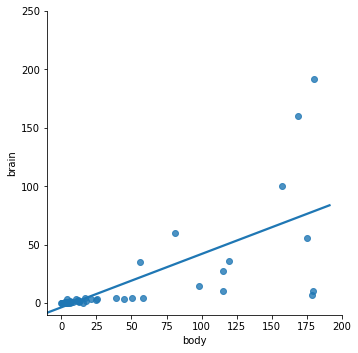

In [15]:
# 산포로를 그려 보자.
lm = sns.lmplot(x='body', y='brain', data=df, ci=None, fit_reg=True)
lm.set(xlim=(-10,200), ylim=(-10,250))

이제 새로운 포유류가 발견됐다고 가정하고, 이 포유류의 모든 구성원의 체중을 측정해 평균 체중을 100으로 계산한다. 이 포유류의 평균 뇌 무게를 예측하고 싶다면 뇌 무게를 약 45로 예측할 수 있다.

이 선은 그래프의 데이터 포인트에 근접하지 않으므로, 사용하는 데 가장 좋은 모델이 아닐 수도 있다. 편향이 너무 높다고 주장할 수도 있다. 나도 동인한다! 선형 회귀 모델은 높은 편향을 갖는 경향이 있지만, 선형 회귀는 뭔가 꿍꿍이가 있어서 매우 낮은 분산을 갖는다.

실제로 무엇을 의미할까?

무작위로 표본을 나눈다고 가정해보자.

In [16]:
np.random.seed(12345)

df['sample'] = np.random.randint(1,3,len(df))
df.head()

,brain,body,sample
id,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


In [17]:
# 두 표본을 비교하면
df.groupby('sample')[['brain', 'body']].mean()

,brain,body
sample,,
1,18.113778,52.068889
2,13.323364,34.669091


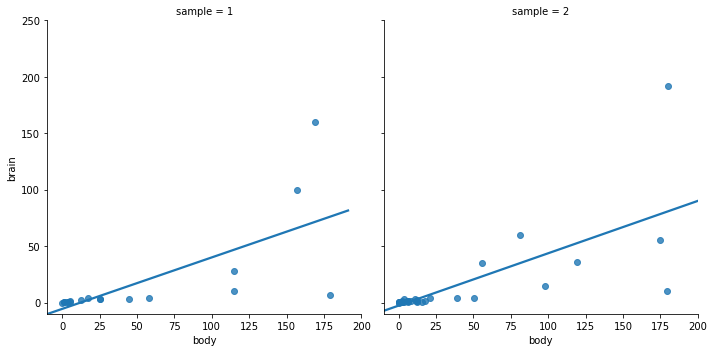

In [18]:
# col = 'sample' 표본을 기준으로 데이터의 부분집합을 만든다. 두 개를 만든다.
# 플롯을 분리한다.
lm = sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample')
lm.set(xlim=(-10,200), ylim=(-10,250))

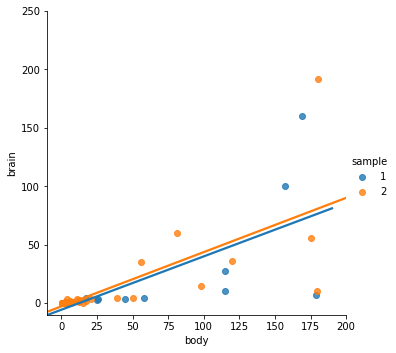

In [19]:
# col = 'sample' 표본을 기준으로 데이터의 부분집합을 만든다. 두 개를 만든다.
# 플롯을 분리한다.
lm = sns.lmplot(x='body', y='brain', data=df, ci=None, hue='sample')
lm.set(xlim=(-10,200), ylim=(-10,250))

선형 회귀가 동일한 모집단에서 추출된 완전히 다른 데이터셋에 적용됐음에도 불구하고, 매우 유사한 선을 생성해 모델의 분산은 낮다.

모델의 복잡성을 높이고 더 많이 학습시키면 어떨까? 선을 맞추는 대신 seaborn을 4차 다항식에 맞쳐보자. 다항식의 차수를 증가함으로써 그래프는 다음과 같이 데이터를 더 잘 나타낼 수 있게 뒤틀릴 수 있다.

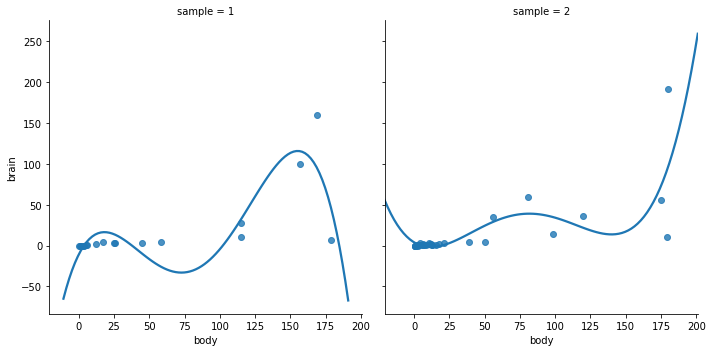

In [20]:
# 낮은 편향, 높은 분산은 어떻게 생겼을까?
# 4차 다항식을 사용해 다항 회귀를 시도해보자.
sns.lmplot(x='body', y='brain', data=df,ci=None, col='sample', order=4)
lm.set(xlim=(-10,200), ylim=(-10,250))

서로 완전히 다른 것을 보아 이것은 높은 분산의 표현이다.

이 모델은 데이터와 잘 일치하기 때문에 편향이 적다. 그러나 표본에 어떤 점이 있는지에 따라 모델이 크게 다르므로 높은 분산이 있다. 체중이 100인 경우 뇌의 무게 에측은 표본에 어떤 데이터가 발생했는지에 따라 크게 변동된다.

자 그럼 선형과 4차원에서 데이터 과학자로서의 역할은 타협점을 찾는 것.

선형 모델보다 편향이 덜한 모델을 만들 수 있고, 4차 다항식보다 분산이 적은 모델을 만들 수도 있을 것이다.

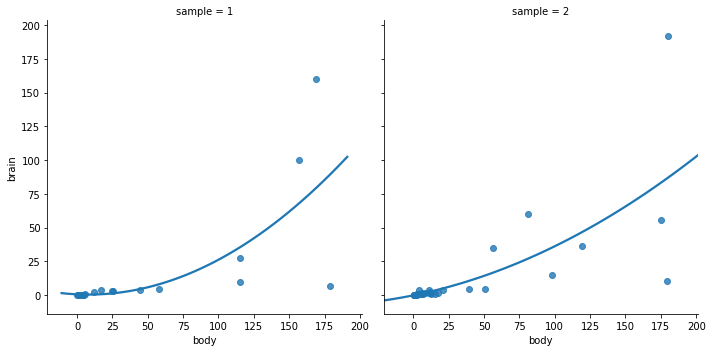

In [21]:
# 2차 다항식을 대신 사용해보자.
sns.lmplot(x='body', y='brain', data=df, ci=None, col='sample', order=2)
lm.set(xlim=(-10,200), ylim=(-10,250))

이 모습이 마치 편향과 분산의 균형이 좋은 것처럼 보인다.

#### Underfitting, Overfitting

Underfitting은 모델이 데이터에 전혀 맞지 않을 때 발생한다. 편향이 높고 분산이 낮은 모델이 언더피팅하는 경향이 있다. 포유동물의 뇌/몸무게 사례의 경우 선형회귀가 데이터를 언더피팅하는 경향이 있다.  

그러면 어떻게 해결?  

- 더 많은 특징 사용: 예측력이 도움이 된다면 새로운 특징을 모델에 포함시켜본다.
- 더 복잡한 모델을 시도: 모델에 복잡성을 추가하면 편향을 개선하는 데 도움이 된다. 지나치게 복잡한 모델은 해롭다.

Overfitting은 모델을 훈련셋에 맞추기가 너무 힘들어 편향은 낮지만 분산은 휠씬 높은 경우다. 낮은 편향과 높은 분산을 가진 모델은 오버피팅이 발생하기 쉽다.  

그러면 어떻게 해결?  

- 더 적은 특징 사용: 더 적은 특징을 사용하면 분산을 줄이고 오버피팅을 방지할 수 있다.
- 더 적은 훈련 표본에 맞춤: 교차 검증에서 더 많은 훈련 데이터 포인트를 사용하면 오버피팅의 영향을 줄이고, 높은 분산 추정량을 개선할 수 있다.

#### 편향 분산이 오차 함수에 미치는 영향

오차 함수(모델이 얼마나 부정확한지 측정)는 편향이나 분산, 또는 줄일 수 없는 오차의 함수로 생각할 수 있다. 수학적으로 말하자면 지도 학습 모델을 사용해 데이터셋을 예측하는 오차는 다음과 같이 보일 수 있다.

Error(x) = Bias^2 +Variance + Irreducible Error

여기에서 Bias^2 오차항(bias term) 제곱이며, Variance는 무작위로 추출된 표본 간에 모델 피딩이 얼마나 다른지 측정한 것이다.

간단히 말해 bias와 variance 모두 오차에 기여한다. 모델의 복잡성을 증가시키면 Bias^2가 감소하고 Variance가 증가하며, 모델의 총 오차가 포물선 모양을 형성한다는 것을 다음과 같이 알 수 있다.

데이터 과학자의 목표는 모델의 복잡성을 최적화하는 Sweet spot을 찾는 것이다. 데이터를 오퍼피팅하는 것은 쉽다. 실제로 오버피팅을 방지하려면 오차에 대한 최상의 예측 변수를 얻기 위해 **교차 검증(반복적으로 데이터셋 분할, 모델 재훈련, 측정 지표 평균화)** 을 사용해야 한다.

유사 패턴 패러다임을 사용하는 지도 학습 알고리즘인 KNN(K-Nearest Neighbors)알고리즘을 사용할 것이다. 이것은 앞에서 살펴본 유사한 데이터 포인트를 기반으로 예측한다는 것을 의미한다.

KNN의 복잡성은 입력 값 K를 가진다. K는 얼마나 많은 유사한 데이터 포인트를 비교해야 하는지 나타낸다. 주어진 입력에 대한 K=3인 경우 가장 가까운 세 개의 데이터 포인트를 찾아 예측에 사용한다. 

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# 홍채 데이터를 읽는다.
from sklearn.datasets import load_iris
iris= load_iris()
X, y = iris.data, iris.target

모델을 오버피팅하는 가장 좋은 방법은 정확히 동일한 데이터를 훈련하고 예측하는 것.

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
knn.score(X,y)

1.0

##### K겹 교차 검증

K-folds cross-validation은 모델 성능의 휠씬 나은 추정량이다. 훈련-검정 분할보다 휠씬 더 좋다.

1. 데이터의 균등하게 한정된 수(3,5,10)를 취한다. 이 수를 k라고 한다.
2. 교차 검증의 각 '겹(fold)'에 대해 섹션의 k-1을 훈련셋으로 취급하고 나머지 섹션은 검정셋으로 취급한다.
3. 나머지 곂에 대해 k-1섹션의 다른 배열은 훈련셋으로 간주되고 다른 섹션은 검정셋이다.
4. 교차 검증의 각 겹에 대해 설정된 측정 지표를 계산한다.
5. 마지막으로 평균 점수를 구한다.

교차 검증은 동일한 데이터셋에서 수행되는 여러 번의 훈련-검정 분할을 효과적으로 이용한다.

https://m.blog.naver.com/PostView.nhn?blogId=ssdyka&logNo=221298211287&categoryNo=24&proxyReferer=&proxyReferer=https%3A%2F%2Fwww.google.com%2F

K겹 교차 검증의 일부 특징은 다음과 같다.
- 이것은 여러 개의 독립적인 훈련-검정 분할을 취하고 결과를 평균화하기 때문에 단일 훈련-검정 분할보다 OOS 예측  오차를 더 정확하게 추정한다.
- 전체 데이터셋이 하나가 아닌 여러 개의 훈련-검정 분할에 사용되기 때문에 단일 훈련-검정 분할보다 더 효율적으로 데이터를 사용한다.
- 데이터셋의 각 레코드는 훈련 및 검정에 사용된다.
- 이 방법은 효율성과 계산 비용 간의 명확한 균현을 나타낸다. 10겹 교차검증은 단일 훈련-검정 분할보다 계산산 10배 더 비싸다.
- 이 방법은 매개변수 튜닝과 모델 선택에 사용될 수 있다.

## 시각화 훈련 오차와 교차 검증 오차

교차 검증 오차와 훈련 오차를 비교하는 것이 중요. 모델의 복잡성에 따라 두 개가 어떻게 변하는지 비교하기 위해 두 개를 같은 그래프에 놓아보자.

포유류 데이터셋을 한 번 더 사용해 교차 검증 오차와 훈련 오차(훈련셋을 예측할 때 오차)를 표시한다.

In [24]:
# 이 함수는 numpy polymonical fit함수를 사용해 주어진 X와 y의 RMSE를 계산

Text(0,0.5,'RMSE')

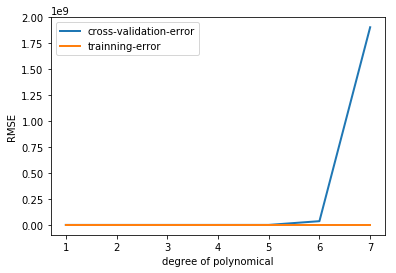

In [40]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def rmse(x,y,coefs):
    yfit=np.polyval(coefs, x)
    rmse = np.sqrt(np.mean((y-yfit) ** 2))
    return rmse

## 뇌와 몸무게
df = pd.read_table("http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt", sep='\s+', skiprows=33,
                  names=['id', 'brain', 'body'], index_col='id')

np.random.seed(7)
xtrain, xtest, ytrain, ytest = train_test_split(df['body'], df['brain'])

train_err=[]
validation_err=[]
degrees=range(1,8)

for i, d in enumerate(degrees):
    p= np.polyfit(xtrain, ytrain, d)
    #numpy polynomical fit 함수 내장
    train_err.append(rmse(xtrain, ytrain, p))
    validation_err.append(rmse(xtest, ytest, p))
    
fig, ax = plt.subplots()
#그래프를 만들기 시작한다.
ax.plot(degrees, validation_err, lw=2, label='cross-validation-error')
ax.plot(degrees, train_err, lw=2, label='trainning-error')

#두 개의 곡선 중 하나는 훈련 오차용, 다른 하나는 교차 검증 오차용이다.

ax.legend(loc=0)
ax.set_xlabel('degree of polynomical')
ax.set_ylabel('RMSE')

따라서 적합도를 높이면 훈련 오차가 문제없이 내려가지만, 모델의 복잡성이 커지면 모델이 데이터에 오버피팅되고 단순히 데이터를 되돌린다는 사실을 알 수 있다.

반면에 교차 검증 오차라인은 휠씬 더 정직하고, 약 2또는 3정도 후에 성능이 떨어진다.

요점은 다음과 같다.
- 언더피팅은 교차 검증 오차와 훈련 오차가 모두 높을 때 발생한다.
- 오버피팅은 교차 검증 오차가 높고, 훈련 오차가 낮을 때 발생한다.
- 교차 검증 오차가 낮고, 훈련 오차보다 단지 약간 높은 경우가 적합하다.

언더피팅(높은 편향)과 오버피팅(높은 분산)은 모두 데이터를 일반화시키기에는 부족.  

그렇다라면 어떻게 해야될까??  

- 훈련 및 검정셋에 더 많은 특징을 추가한다.
- 모델의 복잡성을 추가하거나 좀 더 새롭고 세련된 모델을 시도한다.

모델이 높은 분산이 있는 경우에는 다음과 같다.

- 오버피팅의 효과를 줄이기 위해 더 많은 훈련 표본을 포함시킨다.

일반적으로 편향 분산 트레이드 오프는 학습 알고리즘에서 편향과 분산을 최소화하기 위한 다툼이다. 지난 수십 년 동안 창안된 많은 새로운 학습 알고리즘은 두 영역에서 최고의 성능을 발휘할 의도로 만들어졌다.

## 앙상블 기술

앙상블 학습(Ensemble learning)또는 앙상블은 개별 모델보다 더 정확한 슈퍼 모델을 생성하기 위해 여러 예측 모델을 결합하는 프로세스

- 회귀(Regression): 각 모델의 예측 평균을 취한다.
- 분류(Classification): 투표를 해 가장 일반적인 예측을 사용하거나, 예측된 확률의 평균을 취한다.


이진 분류 문제(0또는 1중 하나 예측)에 대한 작업을 가정

In [41]:
import numpy as np

np.random.seed(4)

#1000개의 관측치를 나타내는 각 모델에 대해 1000개의 임의의 숫자(0와 1사이) 생성
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

이제 다음과 같이 각각 약 70%의 정확도를 갖는 다섯가지 학습 모델을 시뮬레이션

In [42]:
# 난수가 적어도 0.3인 경우 각 모델은 1을 독립적으로 에측하낟("올바른 응답").
pred1= np.where(mod1> 0.3,1,0)
pred2= np.where(mod2> 0.3,1,0)
pred3= np.where(mod3> 0.3,1,0)
pred4= np.where(mod4> 0.3,1,0)
pred5= np.where(mod5> 0.3,1,0)

print(pred1.mean())
print(pred2.mean())
print(pred3.mean())
print(pred4.mean())
print(pred5.mean())

# 이 모델의 정확도는 약 70%

0.715
0.69
0.689
0.696
0.7


In [46]:
#예측을 평균화한 다음 0 또는 1로 반올림한다.
ensemble_preds = np.round((pred1 + pred2 + pred3 + pred4 + pred5)/ 5.0).astype(int)
ensemble_preds.mean()

0.838

마법같이 정확도가 올라갔다...!!!

투표 프로세스에 더 많은 모델을 추가하면 오차 가능성이 줄어든다. 이것은 콩도르세의 배심원 법칙(Condorcet's jury theorem)으로 알려져 있다.

실제로 앙상블이 잘 작동하려면 모델의 특성이 다음과 같아야 한다.
- 정확도: 각 모델은 적어도 null모델보다 성능이 뛰어나야 한다.
- 독립성: 모델의 예측은 다른 모델의 예측 프로세스에 영향을 받지 않는다.

개별적으로 괜찮은 모델을 여러 개 갖고 있는 경우 한 모델에서 만들어진 극단적인 실수는 다른 모델에서는 만들어지지 않을 가능성이 높으므로, 모델을 결합할 때 실수는 무시된다.

앙상블을 위해서는 다음과 같은 두 가지 기본 방법
- 많은 코드를 작성해 개별 모델을 수동으로 앙상블한다.
- 앙상블되는 모델을 사용한다.

앙상블 되는 모델을 살펴보면, 의사 결정 트리를 다시 살펴보자.

의사 결정 트리는 편향이 적고 분산이 높다. 임의의 데이터셋이 주어지면 트리는 데이터셋의 모든 단일 예를 간결하게 구별할 수 있을 때까지 질문(의사 결을 내릴 수 있음)을 계속한다. 각 리프(터미널)노드에 단 하나의 예제가 있을 때까지 계속질문을 던질 수 있다. 트리는 너무 열심히 노력하고 너무 깊게 자라며, 훈련셋의 모든 세부 사항을 암기하는 ㄴ것이다. 그러나 처음부터 다시 시작하면 트리가 다른 질문을 던질 수 있으며, 여전히 매우 깊어질 수 있다. 이것은 모든 요소를 구별할 수 있는 가능한 많은 트리가 있다는 것을 의미한다.즉 더 높은 분산을 의미하고 잘 일반화 할 수 없다.

단일 트리의 분산을 줄이기 위해 트리에서 요청되는 질문의 수(max_depth 파라미터)를 제한하거나 랜덤 포레스트(random forest)라고 하는 의사 결정트리의 앙상블 버전을 만들 수 있다.

## Rando Forest

의사 결정 트리의 가장 큰 약점은 훈련 데이터에서 다른 분할이 매우 다른 트리를 만들 수 있다는 것이다. Bagging은 머신 러닝 방법의 분산을 줄이기 위한 범용적 목적 프로시저이지만, 의사 결정 트리에 특히 유용하다.

Bagging은 Bootstrap 표본의 집합을 의미하는 부트스트랩 집합의 줄임말이다. 표본이란 무엇일까? 이것은 Replacement를 하는 무작위 표본이다.

In [47]:
# 재현성을 위한 임의 시드 설정
np.random.seed(1)

# 1에서 20의 배열 만듬
nums = np.arange(1,21)
print(nums)

np.random.choice(a=nums, size=20, replace=True)
#반복변수가 있는 Bootstrap된 표본 알림이다.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


array([ 6, 12, 13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6,
       19, 12, 11])

그렇다면 어떻게 의사 결정 트리에 대한 Bagging은 작동할까?
1. 훈련데이터의 부트스트랩 표본을 사용해 B트리를 성장시킨다.
2. 부트스트랩 표본의 각 트리를 훈련하고 예측한다.
3. 예측을 결합한다.
    - 회귀 트리에 대한 예측 평균
    - 분류 트리에 투표

다음은 주의해야 할 몇 가지 사항이다.
- 각 부트스트랩 표본은 원래 훈련셋과 동일한 크기여야 한다.
- B는 오차가 안정화된 것처럼 보이도록 충분히 큰 값이어야 한다.
- 트리가 의도적으로 깊게 자라므로 낮은 편향/높은 분산을 갖는다.

트리를 의도적으로 깊게 성장시키는 이유는 배깅이 분산을 줄임으로써 예측 정확도를 본질적으로 증가시키기 때문이다. 교차 검증이 표본 오차를 추정하는 것과 관련있는 분산을 감소시키는 것과 유사하다.

랜던 포레스트는 Bagged트리의 변형이다.

그러나 각 트리를 구축하는 경우 특징 간에 분할을 고려할 때마다 m특징의 무작위 표본이 p특징의 전체 세트에서 분할 후보로 선택된다. 이러한 m 특징 중 하나로 분할이 허용된다.
- 모든 단일 분할에서 모든 단일 트리에 대해 특징의 새로운 무작위 표본이 선택된다.
- 분류의 경우 m은 일반적으로 p의 제곱근이 되게 선택된다.
- 회귀의 경우 일반적으로 m은 p/3과 p사이에서 임의로 선택된다.

그래서 요점은?

데이터셋에 매우 강력한 특징이 하나 있다고 가정하자. 의사 결정(또는 배깅된)트리를 사용할 때 대부분의 트리는 그 특징을 최상위 분할로 사용할 것이다. 이 분할은 결과적으로 서로에게 높게 상관되는 유사한 트리의 앙상블이 된다.

트리의 상호 연관성이 높으면 이러한 양의 평균화해도 분산이 크게 줄어들지 않는다. 또한 각 분할에서 후보 특징을 임의로 제외함으로써 랜덤 포레스트가 결과 모델의 분산을 감소시킨다.

In [87]:
import pandas as pd
# 데이터를 읽음
url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Hitters.csv"
hitters = pd.read_csv(url)

# 값이 누락된 행을 제거
hitters.dropna(inplace=True)

# 범주형 변수를 정수로 인코딩한다.
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]

# 특징 정의: 경력 통계("C"로 시작하는)와 응답(Salary)를 제외한다.
feature_cols = [h for h in hitters.columns if h[0] != 'C' and h != 'Salary']

# X와 y를 정의한다.
X = hitters[feature_cols[1:]]
y = hitters.Salary

일단 하나의 의사 결정 트리를 사용해 급여를 먼저 예측

Text(0,0.5,'RMSE (lower is better)')

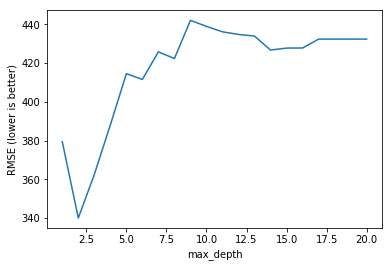

In [88]:
from sklearn.tree import DecisionTreeRegressor

# max_dapth의 각 값에 대한 평균 RMSE를 저장하는 목록
RMSE_scores = []

max_depth_range = range(1,21)

#max_dapth의 각 값으로 10겹 교차 겁증 사용
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
# max_depth(X축) 대 RMSE(y축)을 플로팅한다.
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

이번에는 랜덤 포레스트로 같은 작업을 해보자.

Text(0,0.5,'RMSE (lower is better)')

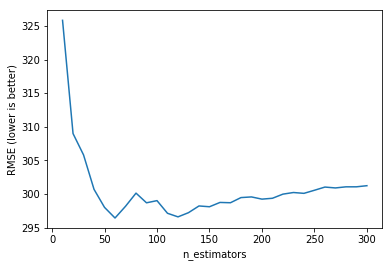

In [90]:
from sklearn.ensemble import RandomForestRegressor

# n_estimators 에 대해서 시도할 값 목록을 만든다.
estimator_range=range(10,310,10)

# n_estimators의 각 값에 대한 평균 RMSE를 저장하는 목록을 만든다.
RMSE_scores=[]

# n_estimators의 각 값으로 5겹 교차 검증을 사용한다()
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores=cross_val_score(rfreg,X,y,cv=5,scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

# n_estimators(x축) 대 RMSE(y축)을 플로팅한다.
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

y축을 보자. RMSE는 평균보다 휠씬 낮다! 랜덤 포레스트를 사용해 예측력이 크게 향상되는지 살펴보자.

의사 결정 트리처럼 랜덤포레스트도 중요한 특징을 갖고 있다.

In [101]:
# n_estimators = 150은 충분히 좋다.
rfreg= RandomForestRegressor(n_estimators=150, random_state=1)
rfreg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [104]:
feature_cols = feature_cols[1:]
feature_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'League',
 'Division',
 'PutOuts',
 'Assists',
 'Errors',
 'NewLeague']

In [103]:
rfreg.feature_importances_

array([0.09155148, 0.13980051, 0.04018308, 0.05746015, 0.13626515,
       0.14678564, 0.26398985, 0.00306682, 0.0076276 , 0.0606466 ,
       0.02336692, 0.02471094, 0.00454528])

In [105]:
pd.DataFrame({'feature': feature_cols, 'importance': rfreg.feature_importances_})

,feature,importance
0,AtBat,0.091551
1,Hits,0.139801
2,HmRun,0.040183
3,Runs,0.057460
4,RBI,0.136265
5,Walks,0.146786
6,Years,0.263990
7,League,0.003067
8,Division,0.007628
9,PutOuts,0.060647


### 랜덤 포레스트와 의사 결정 트리 비교

랜덤 포레스트를 사용하는 것만으로는 데이터 과학 문제의 해결책이 아니라는 점을 인식해야 한다. 랜덤 포레스트가 많은 이점을 제공하지만, 나열된 바와 같이 많은 단점도 있다.

랜덤포레스트의 장점은
- 랜덤 포레스트의 성능은 최상의 지도 학습 방법과 경쟁적이다.
- 특징 중요성에 대해 더 안정적인 추정을 제공한다.
- 훈련/검정 분할이나 교차 검증을 사용하지 않고 표본 밖의 오차를 예측할 수 있다.

단점은  
- 해석하기가 쉽지 않다(의사 결정 트리의 전체 포레스트를 시각화할 수 없음
- 훈련과 예측이 더 느리다(대량 생산 또는 실시간 목적에는 적합하지 않음.)